In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('capo_data.csv')
#starting the df with those with case id higher than 5229
#5229 was identified as being near where new data was tracked
df = df[df['case_id'] >= 5229]

### Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3696 entries, 4534 to 8229
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_id                  3696 non-null   int64  
 1   dem_age                  3689 non-null   float64
 2   dem_sex                  3692 non-null   float64
 3   dem_pregnant             893 non-null    float64
 4   dem_trimester            19 non-null     float64
 5   exam_height              2657 non-null   float64
 6   exam_weight              2747 non-null   float64
 7   exam_hr                  3621 non-null   float64
 8   exam_rr                  3092 non-null   float64
 9   exam_sbp                 3613 non-null   float64
 10  exam_dbp                 3610 non-null   float64
 11  exam_temp                3485 non-null   float64
 12  exam_o2sat               3677 non-null   float64
 13  exam_o2satvalue          3435 non-null   float64
 14  exam_fio2                

In [4]:
df.describe()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_fio2,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_bands,lab_platelets,lab_inr,lab_na,lab_k,lab_bun,lab_creatinine,lab_bicarb,lab_glucose,lab_albumin,lab_ast,lab_alt,lab_bilirubin,lab_trop1,lab_trop2,lab_trop3,lab_ckmb1,lab_ckmb2,lab_ckmb3,lab_ldl,lab_hdl,lab_cholesterol,lab_triglycerides,lab_lactate,lab_hga1c,lab_ldh,lab_bnp,lab_crp,lab_pct,lab_vitamind,lab_abg,lab_abgph,lab_abgpaco2,lab_abgpao2,lab_abgbicarb,lab_abgfio2,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
count,3696.000000,3689.000000,3692.000000,893.000000,19.000000,2657.000000,2747.000000,3621.000000,3092.000000,3613.000000,3610.000000,3485.000000,3677.000000,3435.000000,1833.000000,3539.000000,3533.000000,3318.000000,3610.000000,145.000000,3530.000000,135.000000,3536.000000,3518.000000,2935.000000,3493.000000,2237.000000,3223.000000,1995.000000,596.000000,628.000000,219.000000,1131.000000,410.000000,1053.000000,869.000000,303.000000,139.000000,636.000000,762.000000,935.000000,874.000000,75.000000,7.000000,1273.000000,570.000000,2397.000000,519.000000,5.000000,3672.000000,1696.000000,2429.000000,2170.000000,2388.000000,1651.000000,3625.000000,3626.000000,3634.000000,3623.000000,3634.000000,425.000000,410.000000,3667.000000,3668.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.00000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.00000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000
mean,8578.654491,63.320412,0.575840,0.025756,2.157895,158.660143,72.477976,99.760011,23.666235,126.138943,72.057895,37.515518,0.160457,91.823581,27.590835,0.148064,37.618865,12.597637,21.640607,11.067586,430.464890,1.793778,136.484813,4.014008,40.620146,1.524040,24.336147,139.741638,4.739714,55.620990,49.208599,2.649132,6.986492,18.325632,7.449018,184.112463,168.658033,142.194122,94.116352,38.087927,147.230684,121.009153,3.883067,32.742857,430.247447,2718.227623,74.322495,6.403778,34.640000,0.526688,7.434434,36.011826,67.106661,23.996482,24.278867,0.132966,0.183398,0.415245,0.102677,0.652174,0.230588,0.075610,0.004091,0.407852,0.077922,0.269481,0.168831,0.399080,0.228626,0.400703,0.280032,0.472944,0.280574,0.426677,0.318182,0.439935,0.276515,0.385823,0.317641,0.375812,0.238095,0.321158,0.268939,0.296266,0.17803,0.241342,0.205087,0.212662,0.129600,0.182359,0.150703,0.149892,0.116613,0.15395,0.133387,0.124729,0.248106,0.236201,0.255411,0.253247
std,4213.826271,19.874370,0.494282,0.158495,0.764719,36.979786,20.457169,25.772402,7.161933,26.115502,15.358259,1.291707,0.367079,7.055960,16.623416,0.355214,6.248322,2.562929,321.496785,27.952395,8061.203076,6.531617,5.480228,0.665083,34.611610,5.023375,5.172654,71.512514,6.548049,111.162015,100.939871,24.693274,128.091855,271.068492,132.738479,2073.353356,1032.510196,501.792867,64.144932,31.114369,45.058437,89.498923,5.490330,49.562985,302.567334,7532.527110,105.198423,65.017311,25.124649,0.499355,0.086011,10.116479,23.585707,4.922777,9.217903,0.339584,0.387046,0.492832,0.303579,0.476

In [5]:
df.isna().sum()

case_id                       0
dem_age                       7
dem_sex                       4
dem_pregnant               2803
dem_trimester              3677
exam_height                1039
exam_weight                 949
exam_hr                      75
exam_rr                     604
exam_sbp                     83
exam_dbp                     86
exam_temp                   211
exam_o2sat                   19
exam_o2satvalue             261
exam_fio2                  1863
exam_mental                 157
lab_hematocrit              163
lab_hemoglobin              378
lab_wbc                      86
lab_bands                  3551
lab_platelets               166
lab_inr                    3561
lab_na                      160
lab_k                       178
lab_bun                     761
lab_creatinine              203
lab_bicarb                 1459
lab_glucose                 473
lab_albumin                1701
lab_ast                    3100
lab_alt                    3068
lab_bili

In [6]:
df.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_fio2,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_bands,lab_platelets,lab_inr,lab_na,lab_k,lab_bun,lab_creatinine,lab_bicarb,lab_glucose,lab_albumin,lab_ast,lab_alt,lab_bilirubin,lab_trop1,lab_trop2,lab_trop3,lab_ckmb1,lab_ckmb2,lab_ckmb3,lab_ldl,lab_hdl,lab_cholesterol,lab_triglycerides,lab_lactate,lab_hga1c,lab_ldh,lab_bnp,lab_crp,lab_pct,lab_vitamind,lab_abg,lab_abgph,lab_abgpaco2,lab_abgpao2,lab_abgbicarb,lab_abgfio2,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
4534,5229,64.0,1.0,NaN,NaN,NaN,NaN,150.0,30.0,130.0,80.0,37.8,0.0,92.0,21.0,0.0,42.0,15.0,22.0,NaN,363.0,NaN,129.0,3.0,NaN,2.0,22.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,64.0,22.0,21.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1
4535,5230,92.0,1.0,NaN,NaN,NaN,NaN,76.0,14.0,118.0,NaN,37.2,1.0,NaN,NaN,0.0,35.0,12.0,12.0,NaN,493.0,NaN,136.0,4.0,22.0,1.0,23.0,209.0,3.0,NaN,NaN,NaN,0.7,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840.0,NaN,NaN,NaN,NaN,1.0,NaN,38.2,NaN,22.8,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4536,5231,60.0,1.0,NaN,NaN,178.0,101.0,104.0,22.0,150.0,78.0,37.2,1.0,NaN,NaN,0.0,43.0,10.0,10.0,NaN,368.0,NaN,140.0,4.0,18.0,1.0,30.0,162.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,42.0,175.0,165.0,NaN,NaN,673.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4537,5232,64.0,1.0,NaN,NaN,185.0,68.0,98.0,22.0,134.0,53.0,36.7,0.0,90.0,NaN,0.0,48.0,16.0,16.0,NaN,135.0,NaN,132.0,4.0,NaN,2.0,29.0,118.0,4.0,NaN,NaN,NaN,0.4,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716.0,NaN,NaN,NaN,NaN,1.0,NaN,29.8,NaN,20.9,NaN,0.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4538,5233,56.0,1.0,NaN,NaN,173.0,54.0,96.0,24.0,102.0,56.0,37.2,1.0,NaN,NaN,0.0,48.0,16.0,4.0,NaN,22.0,NaN,138.0,5.0,34.0,2.0,25.0,103.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,2.0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0


In [7]:
#Dropping all columns where 30% or more data is missing
df = df.dropna(axis=1, thresh=len(df) * 0.7)

In [8]:
#checking for missing values
df.isna().sum()

case_id                       0
dem_age                       7
dem_sex                       4
exam_height                1039
exam_weight                 949
exam_hr                      75
exam_rr                     604
exam_sbp                     83
exam_dbp                     86
exam_temp                   211
exam_o2sat                   19
exam_o2satvalue             261
exam_mental                 157
lab_hematocrit              163
lab_hemoglobin              378
lab_wbc                      86
lab_platelets               166
lab_na                      160
lab_k                       178
lab_bun                     761
lab_creatinine              203
lab_glucose                 473
lab_abg                      24
cx_rul                       71
cx_rml                       70
cx_rll                       62
cx_lul                       73
cx_lll                       62
cx_cav                       29
cx_pe                        28
day0test___cough              0
day0test

In [9]:
#filling missing values with the median
df.fillna(df.median(), inplace=True)

In [10]:
#dropping exam_02sat because documentation suggested 
df = df.drop(columns=['exam_o2sat','exam_o2satvalue'])

In [11]:
#making sure no missing values remained
df.isna().sum()

case_id                    0
dem_age                    0
dem_sex                    0
exam_height                0
exam_weight                0
exam_hr                    0
exam_rr                    0
exam_sbp                   0
exam_dbp                   0
exam_temp                  0
exam_mental                0
lab_hematocrit             0
lab_hemoglobin             0
lab_wbc                    0
lab_platelets              0
lab_na                     0
lab_k                      0
lab_bun                    0
lab_creatinine             0
lab_glucose                0
lab_abg                    0
cx_rul                     0
cx_rml                     0
cx_rll                     0
cx_lul                     0
cx_lll                     0
cx_cav                     0
cx_pe                      0
day0test___cough           0
day0test___afebrile        0
day0test___wbc             0
day0test___oral            0
day1test___cough           0
day1test___afebrile        0
day1test___wbc

In [12]:
#Creating TCS Column and setting and initial value
df['tcs'] = -1

for day in range(8):
    
    cols = [f"day{day}test___cough", f"day{day}test___afebrile", f"day{day}test___wbc", f"day{day}test___oral"]
    
    if all(col in df.columns for col in cols):
        total = df[cols[0]] + df[cols[1]] + df[cols[2]] + df[cols[3]]
        df.loc[(total == 4) & (df['tcs'] == -1), 'tcs'] = day
#If TCS is -1 still, right-censoring following the for loop to make it 8
df.loc[df['tcs'] == -1, 'tcs'] = 8
df.loc[df['tcs'] == 0, 'tcs'] = 8
df.sample(10)

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral,tcs
5859,6821,48.0,1.0,167.0,70.0,110.0,24.0,140.0,80.0,40.6,0.0,39.4,14.4,13.10,112.0,124.0,3.2,35.0,1.00,117.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,8
5632,6550,61.0,0.0,167.0,70.0,125.0,23.0,155.0,86.0,39.0,0.0,23.6,8.9,8.20,239.0,133.0,4.1,29.9,1.50,125.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,6
7402,8516,97.0,1.0,159.0,66.0,88.0,20.0,130.0,50.0,38.5,0.0,33.2,10.7,12.20,261.0,140.0,4.8,31.0,2.35,131.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4
6182,7148,85.0,1.0,175.0,75.0,80.0,22.0,105.0,65.0,38.0,0.0,35.8,11.7,17.80,147.0,131.0,3.7,33.0,1.11,159.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5
6953,8003,23.0,0.0,167.0,51.0,100.0,18.0,120.0,75.0,38.2,0.0,33.3,11.6,14.82,222.0,142.0,3.3,19.0,0.54,87.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5105,5904,47.0,1.0,185.0,105.0,110.0,18.0,138.0,65.0,38.9,0.0,39.0,14.0,13.00,103.0,126.0,4.0,25.0,2.00,73.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6119,7085,63.0,1.0,169.0,72.0,120.0,40.0,131.0,60.0,37.2,0.0,41.0,13.6,16.80,332.0,130.0,4.1,31.0,0.60,192.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6
7887,16941,84.0,0.0,167.0,70.0,90.0,24.0,90.0,60.0,38.5,0.0,37.0,12.7,26.00,99.0,139.0,3.6,31.0,1.32,143.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,8
5131,5932,74.0,1.0,163.0,55.0,89.0,19.0,120.0,90.0,38.9,0.0,30.0,10.0,6.00,115.0,137.0,4.0,31.0,1.00,288.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,7
4987,5763,52.0,1.0,180.0,85.0,100.0,28.0,100.0,60.0,37.2,0.0,36.0,10.0,10.00,15.0,130.0,4.0,31.0,1.00,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [13]:
df['tcs'].value_counts()

tcs
8    1215
3     530
2     504
4     479
1     346
5     310
6     167
7     145
Name: count, dtype: int64

In [14]:
#function for checking if the patient was stable by day seven or not
def set_stability_by_day_7(row):
    if 0 <= row['tcs'] <= 7:
        return 1 #Stable by day seven
    else:
        return 0 #not stable by day seven

#function for checking if the patient had an early or late TCS
def set_early_or_late_tcs(row):
    if 0 <= row['tcs'] < 4:
        return 1 #early TCS
    else:
        return 0 #Late TCS
    

#applying the functions to each row and creating the new columns
df['stable_by_day_7'] = df.apply(set_stability_by_day_7, axis=1)
df['early_or_late_tcs'] = df.apply(set_early_or_late_tcs, axis=1)

In [15]:
#making sure the functions worked as intented 
df.sample(10)

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral,tcs,stable_by_day_7,early_or_late_tcs
7072,8126,76.0,1.0,173.0,75.0,70.0,18.0,170.0,90.0,36.5,0.0,40.0,12.5,13.36,554.0,142.0,4.2,48.00,1.04,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
5453,6343,36.0,1.0,160.0,59.0,120.0,24.0,157.0,100.0,38.9,1.0,34.0,11.0,17.00,383.0,134.0,5.0,8.00,1.00,148.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,6,1,0
6770,7799,56.0,0.0,152.0,51.0,119.0,41.0,131.0,69.0,37.0,1.0,31.0,10.0,15.00,251.0,135.0,4.1,26.00,1.20,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
6470,7448,45.0,0.0,152.0,65.0,139.0,26.0,130.0,89.0,39.4,0.0,35.9,12.0,6.80,119.0,138.0,3.7,31.00,0.80,88.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,8,0,0
7165,8230,57.0,1.0,162.0,64.0,111.0,22.0,115.0,92.0,38.6,0.0,34.0,10.7,5.86,137.0,129.0,3.8,8.70,0.85,342.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
6231,7199,28.0,0.0,170.0,60.0,150.0,40.0,135.0,65.0,39.3,0.0,35.9,12.7,10.68,285.0,134.0,3.3,16.00,0.82,95.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0
6706,7726,94.0,0.0,158.0,72.0,120.0,28.0,125.0,65.0,37.1,1.0,40.0,12.3,11.02,247.0,140.0,4.9,31.00,1.80,133.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1
7059,8112,80.0,1.0,167.0,70.0,109.0,22.0,91.0,48.0,38.8,0.0,41.1,13.9,17.75,216.0,135.0,4.7,25.17,6.69,81.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1
8227,21708,59.0,1.0,170.0,70.0,77.0,18.0,130.0,90.0,36.0,0.0,39.6,13.1,4.90,132.0,139.0,5.1,17.00,1.30,88.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
5445,6334,42.0,0.0,168.0,60.0,80.0,24.0,118.0,80.0,38.3,0.0,42.0,14.0,7.00,162.0,139.0,4.0,31.00,1.00,120.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [16]:
#dropping all columns beginning with day 0
df = df[df.columns.drop(list(df.filter(regex='day0')))] #regex searches for the pattern in the text

#dropping all columns beginnign with over 7
df = df[df.columns.drop(list(df.filter(regex='over7')))]

#dropping case id, no longer needed
df.drop(columns=['case_id'], inplace=True)

#creating a copy of the original dataframe, we will need to use it later in the models
df_original = df.copy()
#dropping all columns beginning with lab, it will remain the original dataframe copy
df = df[df.columns.drop(list(df.filter(regex='lab')))]


### Linear Regression Models

In [18]:
X5 = df[['dem_age', 'dem_sex', 'exam_weight', 'exam_hr','exam_rr','exam_sbp',
         'exam_dbp','exam_temp','cx_rul', 'cx_rml', 'cx_rll',
       'cx_lul', 'cx_lll', 'cx_cav', 'cx_pe']]
y5 = df['tcs']

In [19]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.33, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() 
regressor.fit(X5_train.values,y5_train)

LinearRegression()

In [21]:
# shows the intercept and coeffients 
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X5, regressor.coef_))

Intercept:  3.681023356564675
Coefficients:


[('dem_age', 0.01827441155982925),
 ('dem_sex', 0.022929193740367063),
 ('exam_weight', -0.006133516195568071),
 ('exam_hr', 0.004688966272130408),
 ('exam_rr', 0.053083398447097994),
 ('exam_sbp', -0.007634275990571187),
 ('exam_dbp', 0.0033891227588979194),
 ('exam_temp', -0.018385404480515483),
 ('cx_rul', 0.27170483977378035),
 ('cx_rml', 0.14529268923063632),
 ('cx_rll', 0.29653292824743815),
 ('cx_lul', 0.4048942477687191),
 ('cx_lll', -0.21838719910181484),
 ('cx_cav', 1.1401048010470003),
 ('cx_pe', 0.19330051408294502)]

In [22]:
#predicting the test results
y5_pred_regressor= regressor.predict(X5_test.values)

In [23]:
#calculate R sqaured
from sklearn.metrics import r2_score
import math
print(f'R- Sqaure : {r2_score(y5_test,y5_pred_regressor)}')

R- Sqaure : 0.0296122424199855


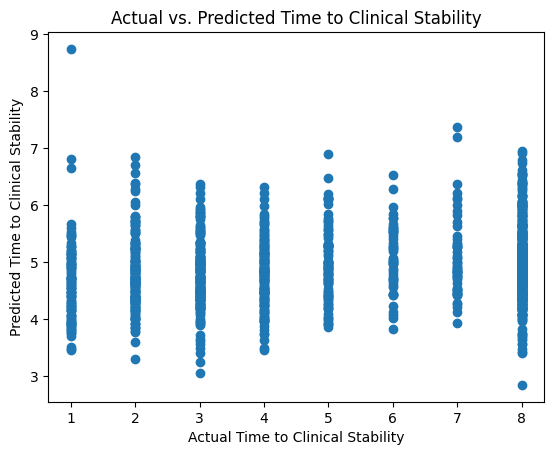

In [24]:
plt.scatter(y5_test, y5_pred_regressor)
plt.xlabel('Actual Time to Clinical Stability')
plt.ylabel('Predicted Time to Clinical Stability')
plt.title('Actual vs. Predicted Time to Clinical Stability')
plt.show()

### Survival Curve

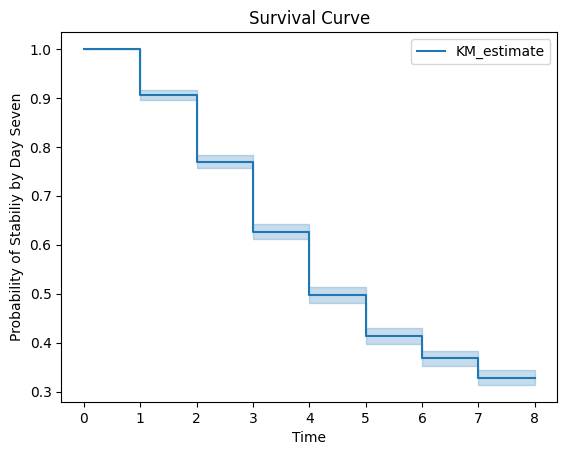

In [25]:
from lifelines import KaplanMeierFitter

times = df['tcs']
events = df['stable_by_day_7']

kmf = KaplanMeierFitter()
kmf.fit(times, event_observed=events)

kmf.plot()
plt.title('Survival Curve')
plt.xlabel('Time')
plt.ylabel('Probability of Stabiliy by Day Seven')

plt.show()

### Logistic Regression Models

Predicting if the patient will be stable within seven days

In [26]:
#assigning columns to X and y for model building
X1 = df.drop('stable_by_day_7',axis = 1)
y1 = df[['stable_by_day_7']]
#removing unnecessary columns from model
X1 = X1[X1.columns.drop(list(df.filter(regex='test')))]
X1.drop(columns = ['tcs','early_or_late_tcs'], inplace=True)


In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                   test_size = .33,
                                                   random_state = 0)

In [28]:
classifier1=LogisticRegression(max_iter=10000)
classifier1.fit(X1_train.values,y1_train.values.ravel())

LogisticRegression(max_iter=10000)

In [29]:
y1_pred = classifier1.predict(X1_test.values)

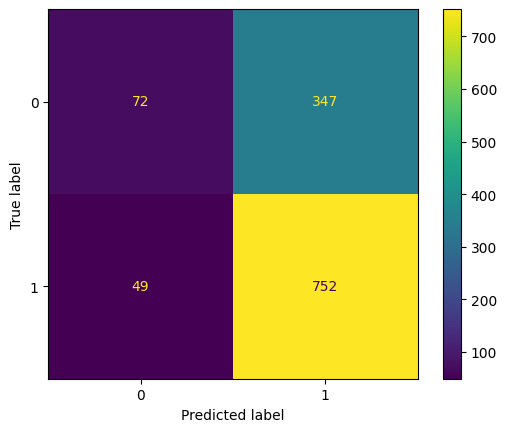

In [30]:
cm1 = confusion_matrix(y1_test, y1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
plt.show()

In [31]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.60      0.17      0.27       419
           1       0.68      0.94      0.79       801

    accuracy                           0.68      1220
   macro avg       0.64      0.56      0.53      1220
weighted avg       0.65      0.68      0.61      1220



In [32]:
print(f'R- Sqaure : {r2_score(y1_test,y1_pred)}')

R- Sqaure : -0.43948942103992916


Seeing if results improve by adding lab results

In [33]:
X2 = df_original.drop('stable_by_day_7',axis = 1)
y2 = df_original[['stable_by_day_7']]
#removing unnecessary columns from model
X2 = X2[X2.columns.drop(list(df.filter(regex='test')))]
X2.drop(columns = ['tcs','early_or_late_tcs'], inplace=True)

In [34]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                   test_size = .33,
                                                   random_state = 0)

In [35]:
classifier2=LogisticRegression(max_iter=10000)
classifier2.fit(X2_train.values,y2_train.values.ravel())

LogisticRegression(max_iter=10000)

In [36]:
y2_pred = classifier2.predict(X2_test.values)

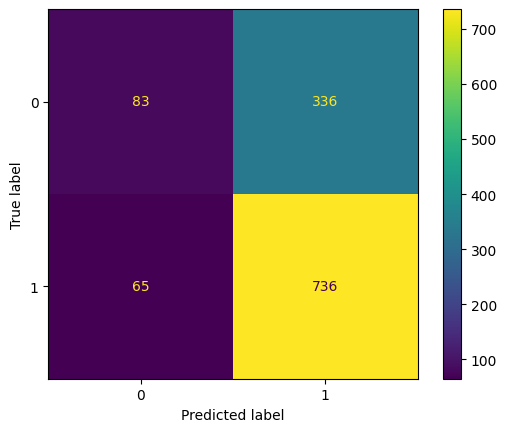

In [37]:
cm2 = confusion_matrix(y2_test, y2_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

In [38]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.56      0.20      0.29       419
           1       0.69      0.92      0.79       801

    accuracy                           0.67      1220
   macro avg       0.62      0.56      0.54      1220
weighted avg       0.64      0.67      0.62      1220



Predicting if the patient will have early or late clinical stability

In [39]:
#assigning columns to X and y for model building
Z3 = df.drop('early_or_late_tcs',axis = 1)
w3= df[['early_or_late_tcs']]
#removing unnecessary columns from model
Z3 = Z3[Z3.columns.drop(list(df.filter(regex='test')))]
Z3.drop(columns = ['tcs','stable_by_day_7'], inplace=True)

In [40]:
Z3_train, Z3_test, w3_train, w3_test = train_test_split(Z3, w3,
                                                   test_size = .33,
                                                   random_state = 0)

In [41]:
classifier3=LogisticRegression(max_iter=10000)
classifier3.fit(Z3_train.values,w3_train.values.ravel())

LogisticRegression(max_iter=10000)

In [42]:
w3_pred = classifier3.predict(Z3_test.values)

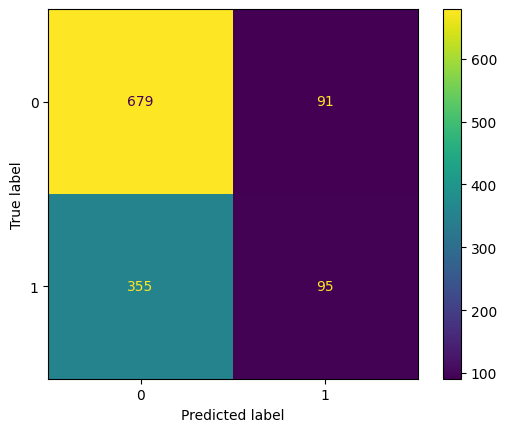

In [43]:
cm3 = confusion_matrix(w3_test, w3_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

In [44]:
print(classification_report(w3_test,w3_pred))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       770
           1       0.51      0.21      0.30       450

    accuracy                           0.63      1220
   macro avg       0.58      0.55      0.53      1220
weighted avg       0.60      0.63      0.59      1220



Seeing if results improve by adding lab results

In [45]:
#assigning columns to X and y for model building
Z4 = df_original.drop('early_or_late_tcs',axis = 1)
w4 = df_original[['early_or_late_tcs']]
#removing unnecessary columns from model
Z4 = Z4[Z4.columns.drop(list(df.filter(regex='test')))]
Z4.drop(columns = ['tcs','stable_by_day_7'], inplace=True)

In [46]:
Z4_train, Z4_test, w4_train, w4_test = train_test_split(Z4, w4,
                                                   test_size = .33,
                                                   random_state = 0)

In [47]:
classifier4=LogisticRegression(max_iter=10000)
classifier4.fit(Z4_train.values,w4_train.values.ravel())

LogisticRegression(max_iter=10000)

In [48]:
w4_pred = classifier4.predict(Z4_test.values)

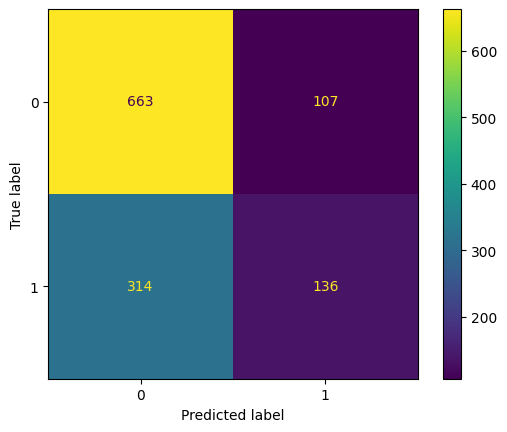

In [49]:
cm4 = confusion_matrix(w4_test, w4_pred)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()
plt.show()

In [50]:
print(classification_report(w4_test,w4_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       770
           1       0.56      0.30      0.39       450

    accuracy                           0.65      1220
   macro avg       0.62      0.58      0.58      1220
weighted avg       0.63      0.65      0.62      1220

